# Programming Exercise 1: Linear Regression

This notebook contains ex1 assignements with my solutions. The purpose of this notebook is to make learning material more accessible and interactive. 

## Introduction
In this exercise, we will implement linear regression and get to see it work on data.

## 1 Simple Octave/Matlab function
The first part of ex1.m gives you practice with Octave/MATLAB syntax and the homework submission process. In the file warmUpExercise.m, you will find the outline of an Octave/MATLAB function. Modify it to return a 5 x 5 identity matrix by filling in the following code:

In [4]:
% If you don't want to display the result of a function add ;
A = eye(5)

A =

Diagonal Matrix

   1   0   0   0   0
   0   1   0   0   0
   0   0   1   0   0
   0   0   0   1   0
   0   0   0   0   1



When you are finished, run ex1.m (assuming you are in the correct directory, type “ex1” at the Octave/MATLAB prompt) and you should see
output similar to the following:

N.B: Whenever the instructions in pdf says to execute ex1.m I execute in the cell below only the part needed for the question.

In [4]:
%% ==================== Part 1: Basic Function ====================
% Complete warmUpExercise.m
fprintf('Running warmUpExercise ... \n');
fprintf('5x5 Identity Matrix: \n');
warmUpExercise()

Running warmUpExercise ... 
5x5 Identity Matrix: 
ans =

Diagonal Matrix

   1   0   0   0   0
   0   1   0   0   0
   0   0   1   0   0
   0   0   0   1   0
   0   0   0   0   1



### 1.1 Submitting solutions
After completing a part of the exercise, you can submit your solutions for grading by typing submit at the Octave/MATLAB command line. The submission script will prompt you for your login e-mail and submission token and ask you which files you want to submit. You can obtain a submission token from the web page for the assignment.

You should now submit your solutions.

In [1]:
% This should be ran from octave/matlab IDE to provide input
%submit

## 2 Linear Regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.
The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.
The ex1.m script has already been set up to load this data for you.

### 2.1 Plotting Data 
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). (Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot.)
In ex1.m, the dataset is loaded from the data file into the variables X and y:

Plotting Data ...


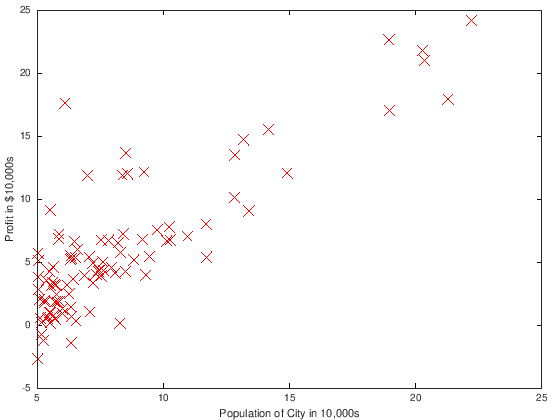

In [1]:
%% ======================= Part 2: Plotting =======================
fprintf('Plotting Data ...\n')
data = load('ex1data1.txt');
X = data(:, 1); y = data(:, 2);
m = length(y); % number of training examples

% Plot Data
% Note: You have to complete the code in plotData.m
plotData(X, y)

### 2.2 Gradient Descent
In this part, you will fit the linear regression parameters θ to our dataset using gradient descent.

#### 2.2.1 Update Equations
The objective of linear regression is to minimize the cost function J(θ) where the hypothesis hθ(x) is given by the linear model

hθ(x) = θTx = θ0 + θ1x1

Recall that the parameters of your model are the θ j values. These are
the values you will adjust to minimize cost J(θ). One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update (simultaneously update θ j for all j).
With each step of gradient descent, your parameters θ j come closer to the optimal values that will achieve the lowest cost J(θ).

>Implementation Note: We store each example as a row in the the X
matrix in Octave/MATLAB. To take into account the intercept term (θ 0 ),
we add an additional first column to X and set it to all ones. This allows
us to treat θ 0 as simply another ‘feature’.

#### 2.2.2 Implementation
In ex1.m, we have already set up the data for linear regression. In the following lines, we add another dimension to our data to accommodate the θ0 intercept term. We also initialize the initial parameters to 0 and the learning rate alpha to 0.01.

In [2]:
X = [ones(m, 1), data(:,1)] % Add a column of ones to x
theta = zeros(2, 1) % initialize fitting parameters
iterations = 1500
alpha = 0.01

X =

    1.0000    6.1101
    1.0000    5.5277
    1.0000    8.5186
    1.0000    7.0032
    1.0000    5.8598
    1.0000    8.3829
    1.0000    7.4764
    1.0000    8.5781
    1.0000    6.4862
    1.0000    5.0546
    1.0000    5.7107
    1.0000   14.1640
    1.0000    5.7340
    1.0000    8.4084
    1.0000    5.6407
    1.0000    5.3794
    1.0000    6.3654
    1.0000    5.1301
    1.0000    6.4296
    1.0000    7.0708
    1.0000    6.1891
    1.0000   20.2700
    1.0000    5.4901
    1.0000    6.3261
    1.0000    5.5649
    1.0000   18.9450
    1.0000   12.8280
    1.0000   10.9570
    1.0000   13.1760
    1.0000   22.2030
    1.0000    5.2524
    1.0000    6.5894
    1.0000    9.2482
    1.0000    5.8918
    1.0000    8.2111
    1.0000    7.9334
    1.0000    8.0959
    1.0000    5.6063
    1.0000   12.8360
    1.0000    6.3534
    1.0000    5.4069
    1.0000    6.8825
    1.0000   11.7080
    1.0000    5.7737
    1.0000    7.8247
    1.0000    7.0931
    1.0000    5.0702
    1.00

#### 2.2.3 Computing the cost J(θ)
As you perform gradient descent to learn minimize the cost function J(θ),it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate J(θ) so you can check the convergence of your gradient descent implementation.
Your next task is to complete the code in the file computeCost.m, which is a function that computes J(θ). As you are doing this, remember that the variables X and y are not scalar values, but matrices whose rows represent the examples from the training set.
Once you have completed the function, the next step in ex1.m will run
computeCost once using θ initialized to zeros, and you will see the cost printed to the screen.
You should expect to see a cost of 32.07.

In [3]:
% compute and display initial cost
J = computeCost(X, y, theta);
fprintf('With theta = [0 ; 0]\nCost computed = %f\n', J);
fprintf('Expected cost value (approx) 32.07\n');

With theta = [0 ; 0]
Cost computed = 32.072734
Expected cost value (approx) 32.07


You should now submit your solutions.

#### 2.2.4 Gradient Descent

Next, you will implement gradient descent in the file gradientDescent.m.
The loop structure has been written for you, and you only need to supply the updates to θ within each iteration.
As you program, make sure you understand what you are trying to opti-
mize and what is being updated. Keep in mind that the cost J(θ) is parameterized by the vector θ, not X and y. That is, we minimize the value of J(θ) by changing the values of the vector θ, not by changing X or y. Refer to the equations in this handout and to the video lectures if you are uncertain.
A good way to verify that gradient descent is working correctly is to look at the value of J(θ) and check that it is decreasing with each step. The starter code for gradientDescent.m calls computeCost on every iteration and prints the cost. Assuming you have implemented gradient descent and computeCost correctly, your value of J(θ) should never increase, and should converge to a steady value by the end of the algorithm.
After you are finished, ex1.m will use your final parameters to plot the linear fit. The result should look something like Figure 2:
Your final values for θ will also be used to make predictions on profits in areas of 35,000 and 70,000 people. Note the way that the following lines in ex1.m uses matrix multiplication, rather than explicit summation or looping, to calculate the predictions. This is an example of code vectorization in
Octave/MATLAB.

In [4]:
% run gradient descent
theta = gradientDescent(X, y, theta, alpha, iterations);

% print theta to screen
fprintf('Theta found by gradient descent:\n');
fprintf('%f\n', theta);
fprintf('Expected theta values (approx)\n');
fprintf(' -3.6303\n  1.1664\n\n');

Theta found by gradient descent:
-3.630291
1.166362
Expected theta values (approx)
 -3.6303
  1.1664



In [5]:
% further testing of the cost function
J = computeCost(X, y, [-1 ; 2]);
fprintf('\nWith theta = [-1 ; 2]\nCost computed = %f\n', J);
fprintf('Expected cost value (approx) 54.24\n');


With theta = [-1 ; 2]
Cost computed = 54.242455
Expected cost value (approx) 54.24


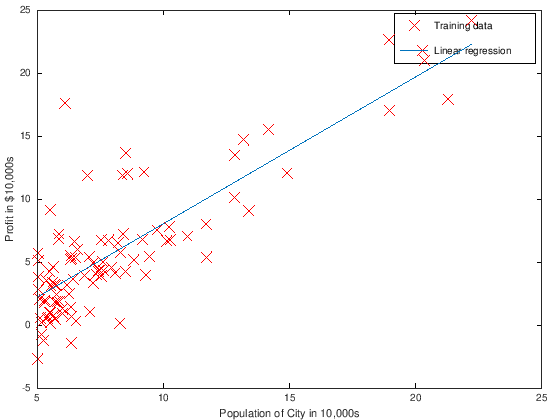

In [6]:
% Plot the linear fit
plotData(data(:,1),data(:,2))
hold on; % keep previous plot visible
plot(X(:,2), X*theta, '-')
legend('Training data', 'Linear regression')
hold off % don't overlay any more plots on this figure

In [7]:
% Predict values for population sizes of 35,000 and 70,000
predict1 = [1, 3.5] *theta;
fprintf('For population = 35,000, we predict a profit of %f\n',...
    predict1*10000);
predict2 = [1, 7] * theta;
fprintf('For population = 70,000, we predict a profit of %f\n',...
    predict2*10000);

For population = 35,000, we predict a profit of 4519.767868
For population = 70,000, we predict a profit of 45342.450129


### 2.3 Debugging
Here are some things to keep in mind as you implement gradient descent:
 - Octave/MATLAB array indices start from one, not zero. If you’re storing θ 0 and θ 1 in a vector called theta, the values will be theta(1) and theta(2).
 - If you are seeing many errors at runtime, inspect your matrix operations to make sure that you’re adding and multiplying matrices of compatible dimensions. Printing the dimensions of variables with the size command will help you debug.
 - By default, Octave/MATLAB interprets math operators to be matrix operators. This is a common source of size incompatibility errors. If you don’t want matrix multiplication, you need to add the “dot” notation to specify this to Octave/MATLAB. For example, A*B does a matrix multiply, while A.*B does an element-wise multiplication.

### 2.4 Visualizing J(θ)

To understand the cost function J(θ) better, you will now plot the cost over a 2-dimensional grid of θ 0 and θ 1 values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.
In the next step of ex1.m, there is code set up to calculate J(θ) over a grid of values using the computeCost function that you wrote.

In [11]:
%% ============= Part 4: Visualizing J(theta_0, theta_1) =============
% Grid over which we will calculate J
theta0_vals = linspace(-10, 10, 100);
theta1_vals = linspace(-1, 4, 100);

% initialize J_vals to a matrix of 0's
J_vals = zeros(length(theta0_vals), length(theta1_vals));

% Fill out J_vals
for i = 1:length(theta0_vals)
    for j = 1:length(theta1_vals)
	  t = [theta0_vals(i); theta1_vals(j)];
	  J_vals(i,j) = computeCost(X, y, t);
    end
end


% Because of the way meshgrids work in the surf command, we need to
% transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals';

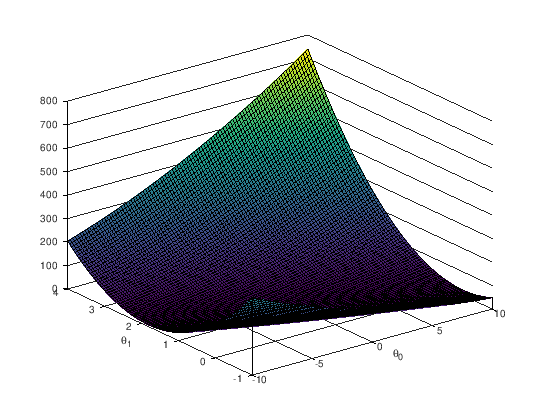

In [20]:
% Surface plot
figure;
surf(theta0_vals, theta1_vals, J_vals)
xlabel('\theta_0'); ylabel('\theta_1');

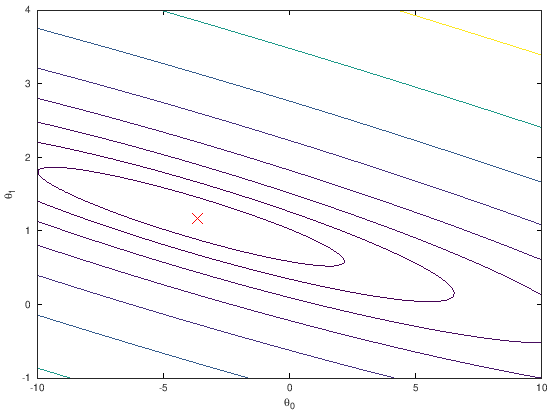

In [13]:
% Contour plot
figure;
% Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
xlabel('\theta_0'); ylabel('\theta_1');
hold on;
plot(theta(1), theta(2), 'rx', 'MarkerSize', 10, 'LineWidth', 2);

The purpose of these graphs is to show you that how J(θ) varies with
changes in θ 0 and θ 1 . The cost function J(θ) is bowl-shaped and has a global mininum. (This is easier to see in the contour plot than in the 3D surface plot). This minimum is the optimal point for θ 0 and θ 1 , and each step of gradient descent moves closer to this point

## Optional Exercices
If you have successfully completed the material above, congratulations! You now understand linear regression and should able to start using it on your own datasets.
For the rest of this programming exercise, we have included the following optional exercises. These exercises will help you gain a deeper understanding of the material, and if you are able to do so, we encourage you to complete them as well.

# 3 Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.
The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.
The ex1 multi.m script has been set up to help you step through this
exercise.

## 3.1 Feature Normalization

The ex1 multi.m script will start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.

Your task here is to complete the code in featureNormalize.m to:
    - Subtract the mean value of each feature from the dataset.
    - After subtracting the mean, additionally scale (divide) the feature values
by their respective “standard deviations.”
The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min). In Octave/MATLAB, you can use the “std” function to compute the standard deviation. For example, inside featureNormalize.m, the quantity X(:,1) contains all the values of x 1 (house sizes) in the training set, so std(X(:,1)) computes the standard deviation of the house sizes.
At the time that featureNormalize.m is called, the extra column of 1’s
corresponding to x 0 = 1 has not yet been added to X (see ex1 multi.m for details).
You will do this for all the features and your code should work with
datasets of all sizes (any number of features / examples). Note that each column of the matrix X corresponds to one feature.

In [21]:
function [X_norm, mu, sigma] = featureNormalize(X)
% You need to set these values correctly
X_norm = X;
mu = zeros(1, size(X, 2));
sigma = zeros(1, size(X, 2));  
m = size(X,1);
mu =  mean (X);
sigma =  std (X);
X_norm = (X - mu) ./ sigma;
end

In [29]:
%% Load Data
data = load('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Print out some data points
fprintf('First 10 examples from the dataset: \n');
fprintf(' x = [%.0f %.0f], y = %.0f \n', [X(1:10,:) y(1:10,:)]');

First 10 examples from the dataset: 
 x = [2104 3], y = 399900 
 x = [1600 3], y = 329900 
 x = [2400 3], y = 369000 
 x = [1416 2], y = 232000 
 x = [3000 4], y = 539900 
 x = [1985 4], y = 299900 
 x = [1534 3], y = 314900 
 x = [1427 3], y = 198999 
 x = [1380 3], y = 212000 
 x = [1494 3], y = 242500 


In [30]:
% Scale features and set them to zero mean
fprintf('Normalizing Features ...\n');

[X mu sigma] = featureNormalize(X);
fprintf('First 10 examples of normalized features: \n');
fprintf('x = [%.5f %.5f], y = %0.f \n', [X(1:10,:) y(1:10,:)]');
% Add intercept term to X
X = [ones(m, 1) X];

Normalizing Features ...
First 10 examples of normalized features: 
x = [0.13001 -0.22368], y = 399900 
x = [-0.50419 -0.22368], y = 329900 
x = [0.50248 -0.22368], y = 369000 
x = [-0.73572 -1.53777], y = 232000 
x = [1.25748 1.09042], y = 539900 
x = [-0.01973 1.09042], y = 299900 
x = [-0.58724 -0.22368], y = 314900 
x = [-0.72188 -0.22368], y = 198999 
x = [-0.78102 -0.22368], y = 212000 
x = [-0.63757 -0.22368], y = 242500 


> Implementation Note: When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters from the model, we often want to predict the prices of houses we have not seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation that we had previously computed from the training set.

## 3.2 Gradient Descent
Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged.
You should complete the code in computeCostMulti.m and gradientDescentMulti.m to implement the cost function and gradient descent for linear regression with multiple variables. If your code in the previous part (single variable) already supports multiple variables, you can use it here too.
Make sure your code supports any number of features and is well-vectorized.
You can use ‘size(X, 2)’ to find out how many features are present in the dataset.

Running gradient descent ...
Theta computed from gradient descent: 
 340412.653452 
 110572.961931 
 -6591.385923 


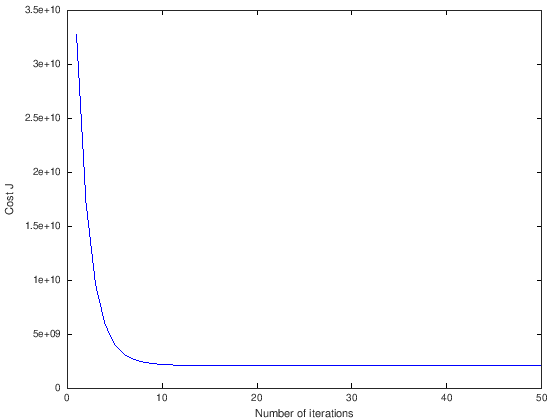

In [32]:
fprintf('Running gradient descent ...\n');

% Choose some alpha value
alpha = 0.3;
num_iters = 50;

% Init Theta and Run Gradient Descent 
theta = zeros(3, 1);
[theta, J_history] = gradientDescentMulti(X, y, theta, alpha, num_iters);

% Plot the convergence graph
figure;
plot(1:numel(J_history), J_history, '-b', 'LineWidth', 2);
xlabel('Number of iterations');
ylabel('Cost J');
% plotting different results of alpha together
%hold on;
%[theta, J1_history] = gradientDescentMulti(X, y, theta, 1.5, 50);
%plot(1:numel(J1_history), J1_history(1:50), '-r', 'LineWidth', 2);

%[theta, J2_history] = gradientDescentMulti(X, y, theta, 0.001, 50);
%plot(1:numel(J2_history), J2_history(1:50), '-k', 'LineWidth', 2);


% Display gradient descent's result
fprintf('Theta computed from gradient descent: \n');
fprintf(' %f \n', theta);

### 3.2.1 Optional (ungraded) exercise: Selecting learning rates
In this part of the exercise, you will get to try out different learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying ex1 multi.m and changing the part of the code that sets the learning rate.
    
   The next phase in ex1 multi.m will call your gradientDescent.m function and run gradient descent for about 50 iterations at the chosen learning rate. The function should also return the history of J(θ) values in a vector J. After the last iteration, the ex1 multi.m script plots the J values against the number of the iterations.
    
   If you picked a learning rate within a good range, your plot look similar Figure 4. If your graph looks very different, especially if your value of J(θ) increases or even blows up, adjust your learning rate and try again. We recommend trying values of the learning rate α on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on).
You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

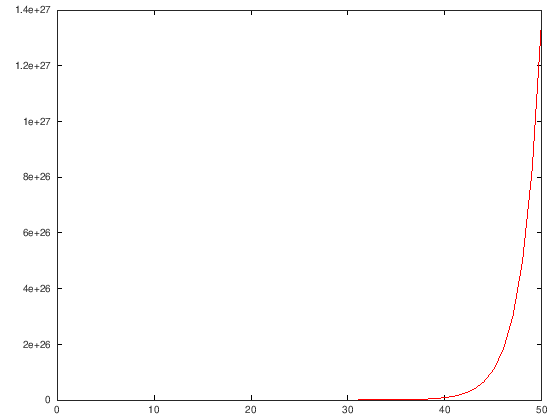

In [37]:
[theta, J1_history] = gradientDescentMulti(X, y, theta, 1.5, 50);
plot(1:numel(J1_history), J1_history(1:50), '-r', 'LineWidth', 2);

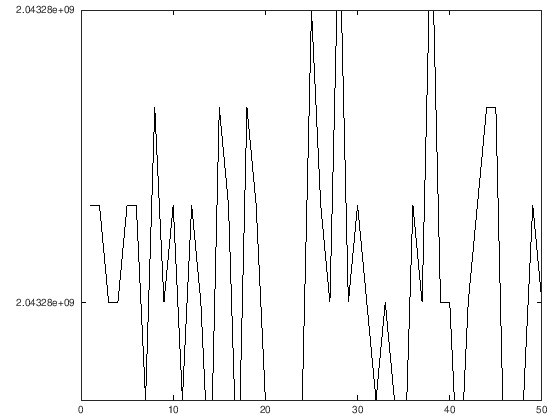

In [34]:
[theta, J2_history] = gradientDescentMulti(X, y, theta, 0.001, 50);
plot(1:numel(J2_history), J2_history(1:50), '-k', 'LineWidth', 2);

## 3.3 Normal Equations
In the lecture videos, you learned that the closed-form solution to linear regression is 

θ = (XTX)-1 XT y 

Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent.

In [39]:
%% Load Data
data = csvread('ex1data2.txt');
X = data(:, 1:2);
y = data(:, 3);
m = length(y);

% Add intercept term to X
X = [ones(m, 1) X];

% Calculate the parameters from the normal equation
theta = normalEqn(X, y);

% Display normal equation's result
fprintf('Theta computed from the normal equations: \n');
fprintf(' %f \n', theta);

Theta computed from the normal equations: 
 89597.909542 
 139.210674 
 -8738.019112 


In [43]:
% Estimate the price of a 1650 sq-ft, 3 br house
% ====================== YOUR CODE HERE ======================
price = 0; % You should change this
price = [1 1650 3] * theta;
fprintf(['Predicted price of a 1650 sq-ft, 3 br house ' ...
         '(using normal equations):\n $%f\n'], price);

Predicted price of a 1650 sq-ft, 3 br house (using normal equations):
 $293081.464335
